<a href="https://colab.research.google.com/github/Zahab163/Income_Inequality_in_Developing_Nations/blob/main/Income_Inequality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#💵 Income Inequality Prediction

##Description:
Income inequality - when income is distributed in an uneven manner among
a population - is a growing problem in developing nations across the world.
With the rapid rise of AI and worker automation, this problem could continue to
grow if steps are not taken to address the issue. This solution can potentially
reduce the cost and improve the accuracy of monitoring key population
indicators such as income level in between census years. This information will
help policymakers to better manage and avoid income inequality globally.
###Problem Statement:
The target feature is `income_above_limit` which is a binary-class variable.
The objective of this challenge is to create a machine learning model to predict
whether an individual earns above or below a certain amount. Your metric for
evaluation will be f1-score

### Import necessary libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score, classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, auc
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# The scikit-plot import is causing compatibility issues with scipy, temporarily removing it.
# from imblearn.over_sampling import SMOTE
import os
import warnings
warnings.filterwarnings('ignore')



In [2]:
 from imblearn.over_sampling import SMOTE

In [3]:
%matplotlib inline

In [4]:
sheet_id = "1NcmQLYZ10HHwSQEVY8CL4A9Wvhf2ecw8pkB7OluyYKY"
csv_url = f"https://docs.google.com/spreadsheets/d/1NcmQLYZ10HHwSQEVY8CL4A9Wvhf2ecw8pkB7OluyYKY/export?format=csv"

df = pd.read_csv(csv_url)
print("\nFirst few rows:")
df.head()


First few rows:


,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,NaN,NaN,Widowed,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,NaN,NaN,Widowed,White,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,2366.75,Below limit
2,ID_TZ0002,21,Male,12th grade no diploma,Federal government,NaN,Never married,Black,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,NaN,NaN,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,...,India,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1580.79,Below limit


**let's discuss what's going on here?**

our file is in the same google file where our google colab notebook is but it's in the form of google sheet not `.csv`file and in pandas `.csv` file will format .So, what we have done here in these two lines of code :
* We are changing the format of file from google sheet to `.csv` file .
* yes, we could also do it the other way simply download the file from google sheet to `.csv ` format , than process the coding which I would definitely do for vs code for streamlit app .

**What's going on with in the data?**

As you can see we have a lot of `NaN` values (Not a Number) which are counted in missing data and some unwanted columns which we will deal with.

In [5]:
print("\n Information of the data")
print(df.info())


 Information of the data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209499 entries, 0 to 209498
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              209499 non-null  object 
 1   age                             209499 non-null  int64  
 2   gender                          209499 non-null  object 
 3   education                       209499 non-null  object 
 4   class                           104254 non-null  object 
 5   education_institute             13302 non-null   object 
 6   marital_status                  209499 non-null  object 
 7   race                            209499 non-null  object 
 8   is_hispanic                     208617 non-null  object 
 9   employment_commitment           209499 non-null  object 
 10  unemployment_reason             6520 non-null    object 
 11  employment_stat                 209499 non-null  int

As we can see that the data is huge and we have many data type= Object which we have to deal with.
* for Machine Learning Modeling we have to convert the data into numerical .


In [6]:
print("\nMissing values before preprocessing:")
print(df.isnull().sum().sum())


Missing values before preprocessing:
1745282


In [7]:
# Handle missing values
print("Missing values before preprocessing:")
print(df.isnull().sum().sort_values(ascending=False).head(10))

Missing values before preprocessing:
veterans_admin_questionnaire    207415
unemployment_reason             202979
education_institute             196197
old_residence_reg               193148
old_residence_state             193148
is_labor_union                  189420
under_18_family                 151654
residence_1_year_ago            106284
occupation_code_main            105694
class                           105245
dtype: int64


In [8]:
missing_part = (df.isnull().sum() / len(df) * 100).sort_values(ascending = False)
print("\nMissing part of data in percentage:\n",missing_part[missing_part > 50])
print("\n Total columns with more than 50% of Missing Data:\m", (missing_part >50).sum())


Missing part of data in percentage:
 veterans_admin_questionnaire    99.005246
unemployment_reason             96.887813
education_institute             93.650566
old_residence_reg               92.195189
old_residence_state             92.195189
is_labor_union                  90.415706
under_18_family                 72.388890
residence_1_year_ago            50.732462
occupation_code_main            50.450837
class                           50.236517
dtype: float64

 Total columns with more than 50% of Missing Data:\m 10


As we can see , here we are missing a huge data more than 50% , which is not good for Machine learning , we could use imputation but it's not good either ... so we will drop some of these data ...as we can see there is a huge data.

In [9]:
cols_to_drop = missing_part[missing_part > 50].index.to_list()

#Add all columns to drop in one list
cols_to_drop.extend([
    #missing a large data (more than 50%)
    "veterans_admin_questionnaire",
    "unemployment_reason",
    "education_institute",
    "old_residence_reg",
    "old_residence_state",
    "is_labor_union",
    "under_18_family",
    "residence_1_year_ago",
    "occupation_code_main",
    "class",
    #Unneccessary data
    "ID",
    "is_hispanic",
    "migration_prev_sunbelt",
    "migration_code_change_in_msa",
    "migration_code_move_within_reg",
    "migration_code_change_in_reg",
    "country_of_birth_own",
    "country_of_birth_father",
    "country_of_birth_mother",
    "country_of_birth_self",
    "citizenship",
    "household_stat",
    "household_summary",
    "employment_commitment",
    "industry_code_main "

])


#REmove duplicates and drop
cols_to_drop = list(set(cols_to_drop))
df.drop(columns = cols_to_drop, inplace = True, errors='ignore')
print(f"\nDropped {len(cols_to_drop)} columns")
print(f"\nRemaining columns: {df.shape[1]}")
print(f"\nRemaining columns:\n{df.columns.tolist()}")


Dropped 25 columns

Remaining columns: 20

Remaining columns:
['age', 'gender', 'education', 'marital_status', 'race', 'employment_stat', 'wage_per_hour', 'working_week_per_year', 'industry_code', 'industry_code_main', 'occupation_code', 'total_employed', 'vet_benefit', 'tax_status', 'gains', 'losses', 'stocks_status', 'mig_year', 'importance_of_record', 'income_above_limit']


In [11]:
# Shape of dataset
print('Rows: {} Columns: {}'.format(df.shape[0], df.shape[1]))

Rows: 209499 Columns: 20


As we could clearly see that our data is turning to clean

In [12]:
print("\n Data Types:")
print(df.dtypes.value_counts())


 Data Types:
int64      12
object      7
float64     1
Name: count, dtype: int64


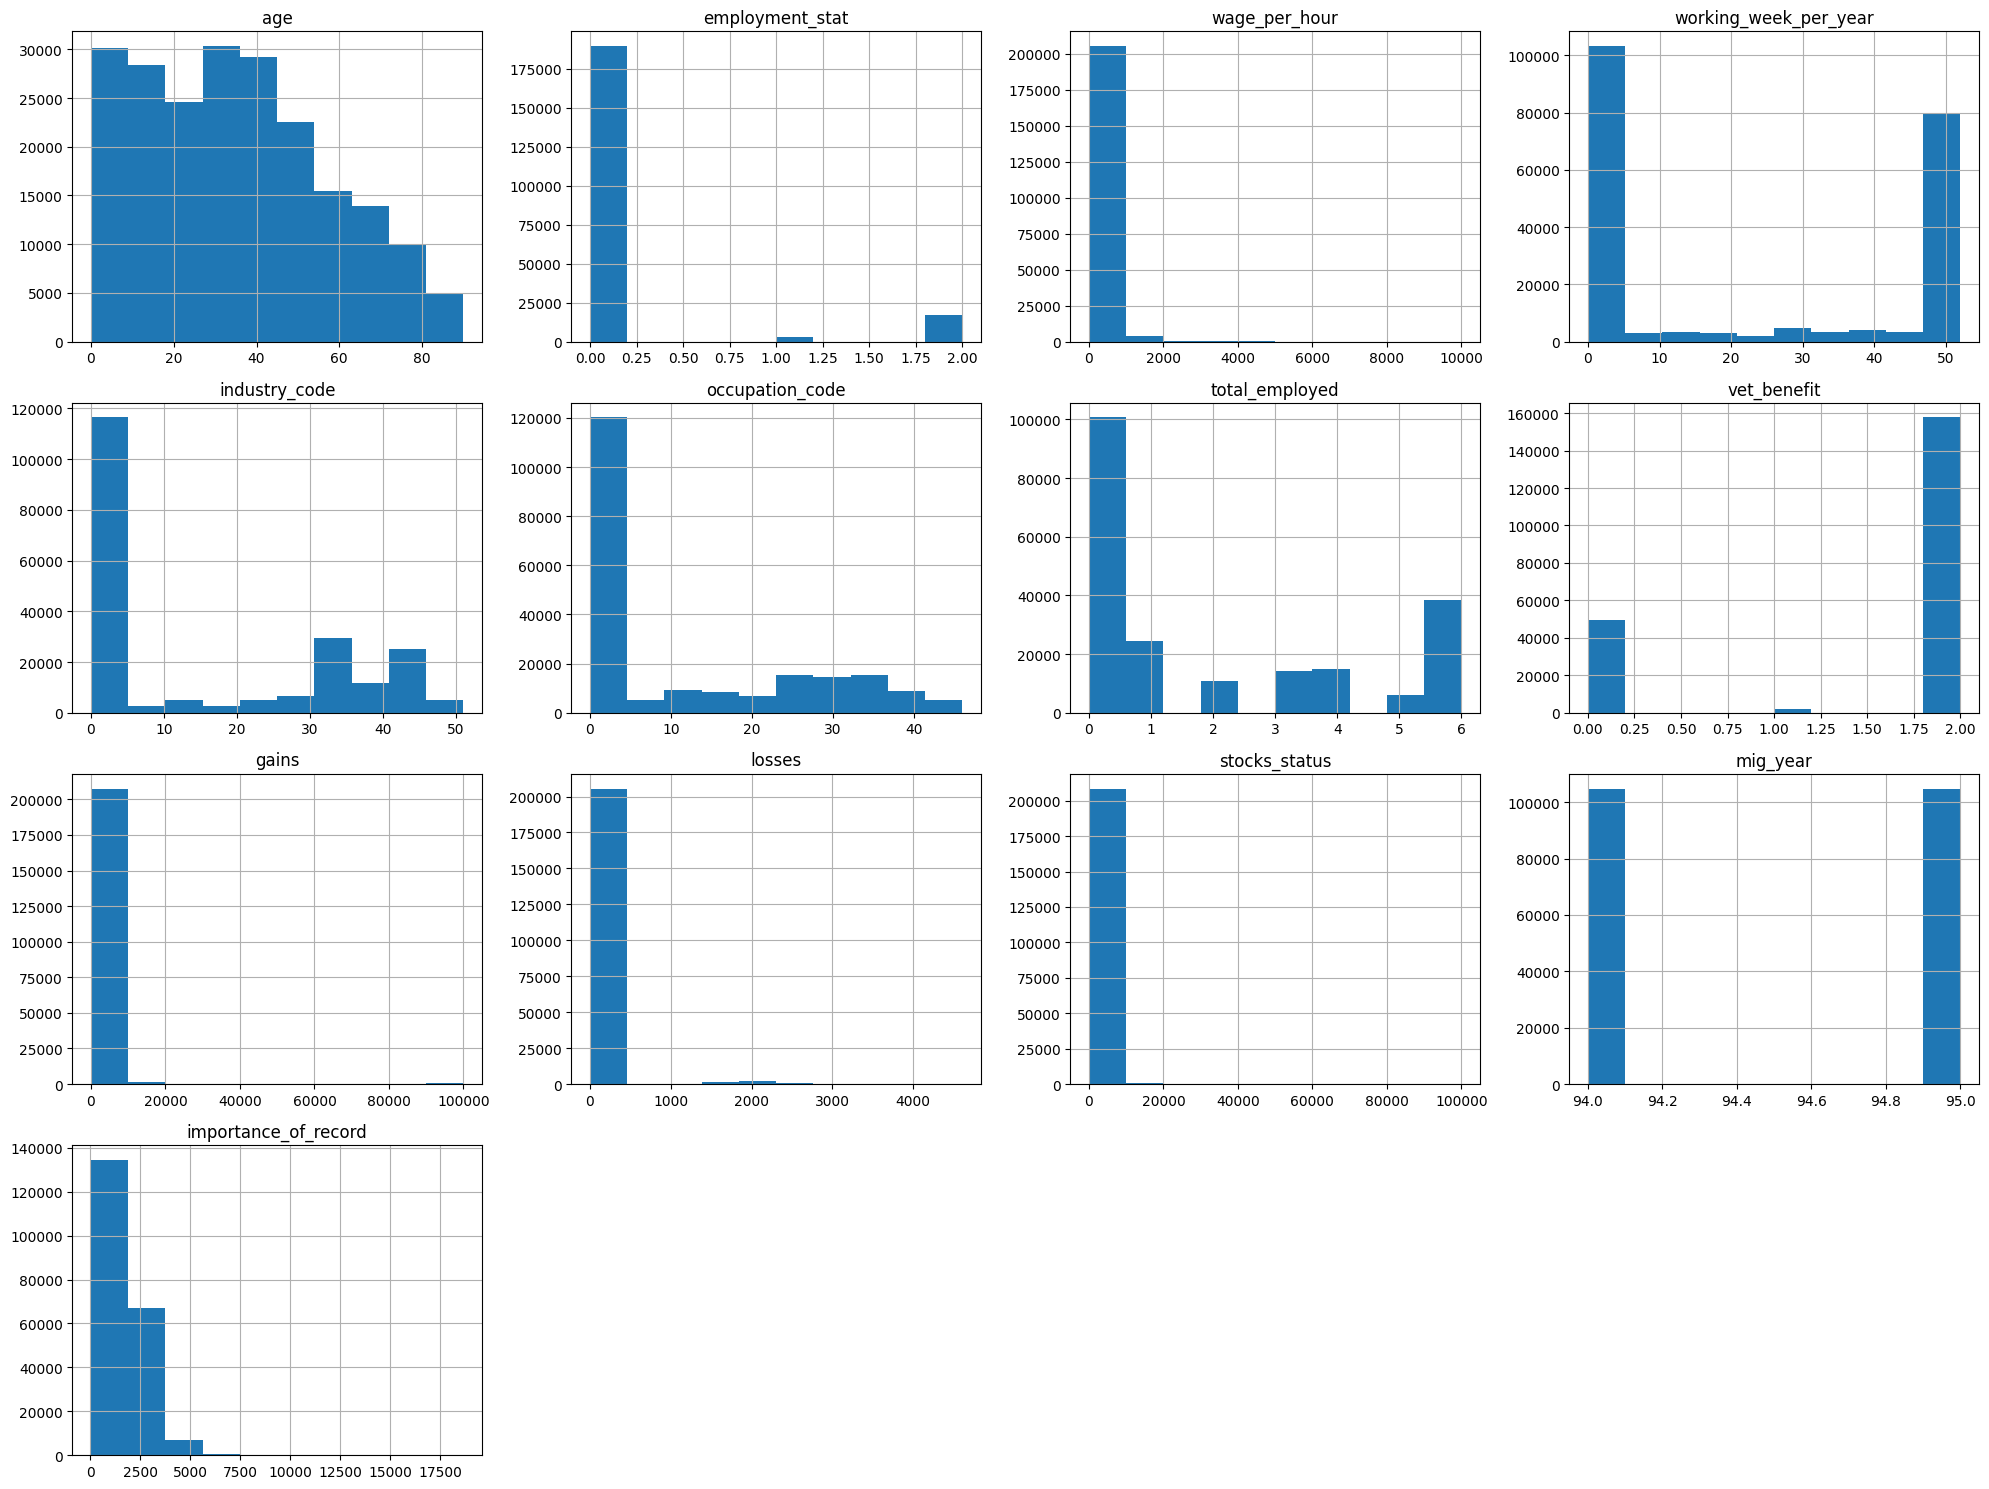

In [15]:
df.hist(bins=10, figsize=(20, 15))
plt.tight_layout()
plt.show()

In [16]:
print("\n Unique values in each column:")
for col in ["gender", "education", "marital_status", "race", "tax_status", "income_above_limit"]:
    print(f"{col}: {df[col].nunique()}")
    print(f"{col}: {df[col].unique()}")


 Unique values in each column:
gender: 2
gender: ['Female' 'Male']
education: 17
education: ['High school graduate' '12th grade no diploma' 'Children'
 'Bachelors degree(BA AB BS)' '7th and 8th grade' '11th grade' '9th grade'
 'Masters degree(MA MS MEng MEd MSW MBA)' '10th grade'
 'Associates degree-academic program' '1st 2nd 3rd or 4th grade'
 'Some college but no degree' 'Less than 1st grade'
 'Associates degree-occup /vocational'
 'Prof school degree (MD DDS DVM LLB JD)' '5th or 6th grade'
 'Doctorate degree(PhD EdD)']
marital_status: 7
marital_status: ['Widowed' 'Never married' 'Married-civilian spouse present' 'Divorced'
 'Married-spouse absent' 'Separated' 'Married-A F spouse present']
race: 5
race: ['White' 'Black' 'Asian or Pacific Islander' 'Amer Indian Aleut or Eskimo'
 'Other']
tax_status: 6
tax_status: ['Head of household' 'Single' 'Nonfiler' 'Joint both 65+'
 'Joint both under 65' 'Joint one under 65 & one 65+']
income_above_limit: 2
income_above_limit: ['Below limit' 'Ab

In [17]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 1. Label Encode binary column
le_income = LabelEncoder()
df['income_above_limit_encoded'] = le_income.fit_transform(df['income_above_limit'])

# 2. Label Encode 'education' with custom order
education_order = [
    'Less than 1st grade', '1st 2nd 3rd or 4th grade', '5th or 6th grade',
    '7th and 8th grade', '9th grade', '10th grade', '11th grade', '12th grade no diploma',
    'High school graduate', 'Some college but no degree',
    'Associates degree-occup /vocational', 'Associates degree-academic program',
    'Bachelors degree(BA AB BS)', 'Masters degree(MA MS MEng MEd MSW MBA)',
    'Prof school degree (MD DDS DVM LLB JD)', 'Doctorate degree(PhD EdD)', 'Children'
]
df['education'] = pd.Categorical(df['education'], categories=education_order, ordered=True)
df['education_encoded'] = df['education'].cat.codes

# 3. One-Hot Encode nominal columns
df_onehot = pd.get_dummies(df[['gender', 'marital_status', 'race', 'tax_status']], drop_first=True)

# 4. Combine all encoded features into one DataFrame
df_final = pd.concat([
    df[['income_above_limit_encoded', 'education_encoded']],
    df_onehot
], axis=1)

# Final encoded DataFrame
df_final.head()

,income_above_limit_encoded,education_encoded,gender_Male,marital_status_Married-A F spouse present,marital_status_Married-civilian spouse present,marital_status_Married-spouse absent,marital_status_Never married,marital_status_Separated,marital_status_Widowed,race_Asian or Pacific Islander,race_Black,race_Other,race_White,tax_status_Joint both 65+,tax_status_Joint both under 65,tax_status_Joint one under 65 & one 65+,tax_status_Nonfiler,tax_status_Single
0,1,8,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False
1,1,8,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True
2,1,7,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True
3,1,16,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False
4,1,8,True,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False


In [18]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209499 entries, 0 to 209498
Data columns (total 18 columns):
 #   Column                                          Non-Null Count   Dtype
---  ------                                          --------------   -----
 0   income_above_limit_encoded                      209499 non-null  int64
 1   education_encoded                               209499 non-null  int8 
 2   gender_Male                                     209499 non-null  bool 
 3   marital_status_Married-A F spouse present       209499 non-null  bool 
 4   marital_status_Married-civilian spouse present  209499 non-null  bool 
 5   marital_status_Married-spouse absent            209499 non-null  bool 
 6   marital_status_Never married                    209499 non-null  bool 
 7   marital_status_Separated                        209499 non-null  bool 
 8   marital_status_Widowed                          209499 non-null  bool 
 9   race_Asian or Pacific Islander                  

In [19]:
df.head()

,age,gender,education,marital_status,race,employment_stat,wage_per_hour,working_week_per_year,industry_code,industry_code_main,...,vet_benefit,tax_status,gains,losses,stocks_status,mig_year,importance_of_record,income_above_limit,income_above_limit_encoded,education_encoded
0,79,Female,High school graduate,Widowed,White,0,0,52,0,Not in universe or children,...,2,Head of household,0,0,292,95,1779.74,Below limit,1,8
1,65,Female,High school graduate,Widowed,White,0,0,0,0,Not in universe or children,...,2,Single,0,0,0,94,2366.75,Below limit,1,8
2,21,Male,12th grade no diploma,Never married,Black,0,500,15,41,Hospital services,...,2,Single,0,0,0,94,1693.42,Below limit,1,7
3,2,Female,Children,Never married,Asian or Pacific Islander,0,0,0,0,Not in universe or children,...,0,Nonfiler,0,0,0,94,1380.27,Below limit,1,16
4,70,Male,High school graduate,Married-civilian spouse present,White,0,0,0,0,Not in universe or children,...,2,Joint both 65+,0,0,0,95,1580.79,Below limit,1,8


In [20]:
# Statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,209499.0,34.518728,22.306738,0.00,15.00,33.00,50.00,90.0
employment_stat,209499.0,0.176760,0.555562,0.00,0.00,0.00,0.00,2.0
wage_per_hour,209499.0,55.433487,276.757327,0.00,0.00,0.00,0.00,9999.0
working_week_per_year,209499.0,23.158850,24.397963,0.00,0.00,8.00,52.00,52.0
industry_code,209499.0,15.332398,18.049655,0.00,0.00,0.00,33.00,51.0
occupation_code,209499.0,11.321734,14.460839,0.00,0.00,0.00,26.00,46.0
total_employed,209499.0,1.956067,2.365154,0.00,0.00,1.00,4.00,6.0
vet_benefit,209499.0,1.515854,0.850853,0.00,2.00,2.00,2.00,2.0
gains,209499.0,435.926887,4696.359500,0.00,0.00,0.00,0.00,99999.0
losses,209499.0,36.881737,270.383302,0.00,0.00,0.00,0.00,4608.0


.T then transposes (switches rows and columns) this summary table, which often makes it easier to read and analyze, especially when you have many columns.

* we could see our data is not accurate look at the mean and medians
it's visible..


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_count(df_final: pd.DataFrame, col: str, title_name: str = 'Train', label_map: dict = None) -> None:
    plt.rcParams['figure.facecolor'] = '#FFFAF0'
    f, ax = plt.subplots(1, 2, figsize=(12, 6))
    plt.subplots_adjust(wspace=0.1)

    # Count values
    s1 = df_final[col].value_counts()
    N = len(s1)

    # Label mapping
    if label_map:
        labels = [label_map.get(val, str(val)) for val in s1.index]
    elif df_final[col].dtype == 'bool':
        base = col.split('_')[-1]
        labels = [base if val else f'Not {base}' for val in s1.index]
    else:
        labels = [str(val) for val in s1.index]

    outer_sizes = s1
    inner_sizes = s1 / s1.sum()

    outer_colors = ['#9E3F00', '#eb5e00', '#ff781f']
    inner_colors = ['#ff6905', '#ff8838', '#ffa66b']

    ax[0].pie(
        outer_sizes, colors=outer_colors[:N],
        labels=labels, startangle=90, frame=True, radius=1.4,
        explode=[0.05] * (N - 1) + [0.3],
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
        textprops={'fontsize': 12, 'weight': 'bold'}
    )

    ax[0].pie(
        inner_sizes, colors=inner_colors[:N],
        radius=1, startangle=90,
        autopct='%1.f%%', explode=[0.1] * (N - 1) + [0.3],
        pctdistance=0.8,
        textprops={'size': 13, 'weight': 'bold', 'color': 'white'}
    )

    center_circle = plt.Circle((0, 0), .68, color='black', fc='white', linewidth=0)
    ax[0].add_artist(center_circle)

    # Bar chart
    sns.barplot(x=s1.values, y=labels, ax=ax[1], palette='YlOrBr_r', orient='horizontal')
    ax[1].spines['top'].set_visible(False)
    ax[1].spines['right'].set_visible(False)
    ax[1].tick_params(axis='x', bottom=False, labelbottom=False)

    for i, v in enumerate(s1):
        ax[1].text(v, i + 0.1, str(v), color='black', fontweight='bold', fontsize=12)

    plt.setp(ax[1].get_yticklabels(), fontweight="bold")
    plt.setp(ax[1].get_xticklabels(), fontweight="bold")
    ax[1].set_xlabel(col, fontweight="bold", color='black')
    ax[1].set_ylabel('count', fontweight="bold", color='black')

    f.suptitle(f'{title_name}', fontsize=18, fontweight='bold')
    plt.tight_layout()
    plt.show()
    plt.rcParams['figure.facecolor'] = '#FFFFFF'


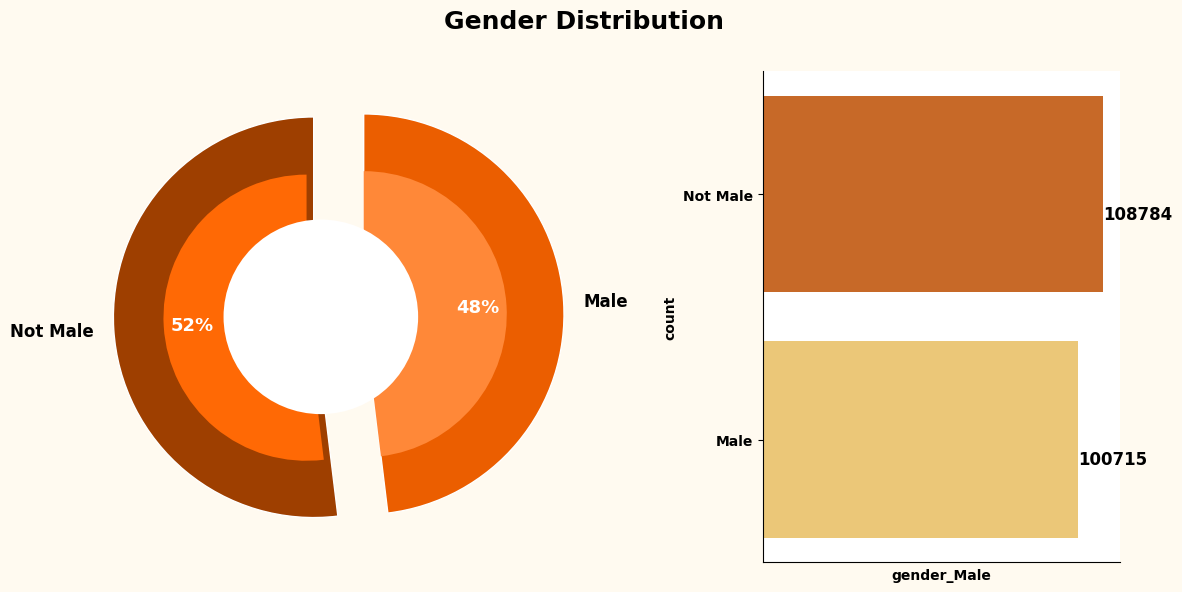

In [25]:
plot_count(df_final, 'gender_Male', 'Gender Distribution')


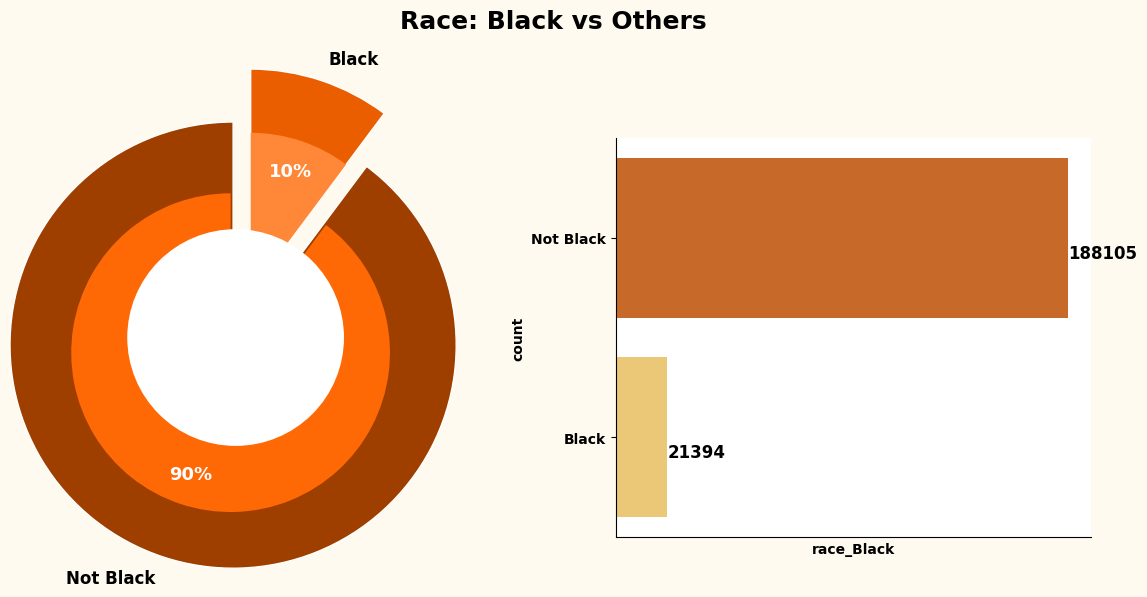

In [26]:
plot_count(df_final, 'race_Black', 'Race: Black vs Others')


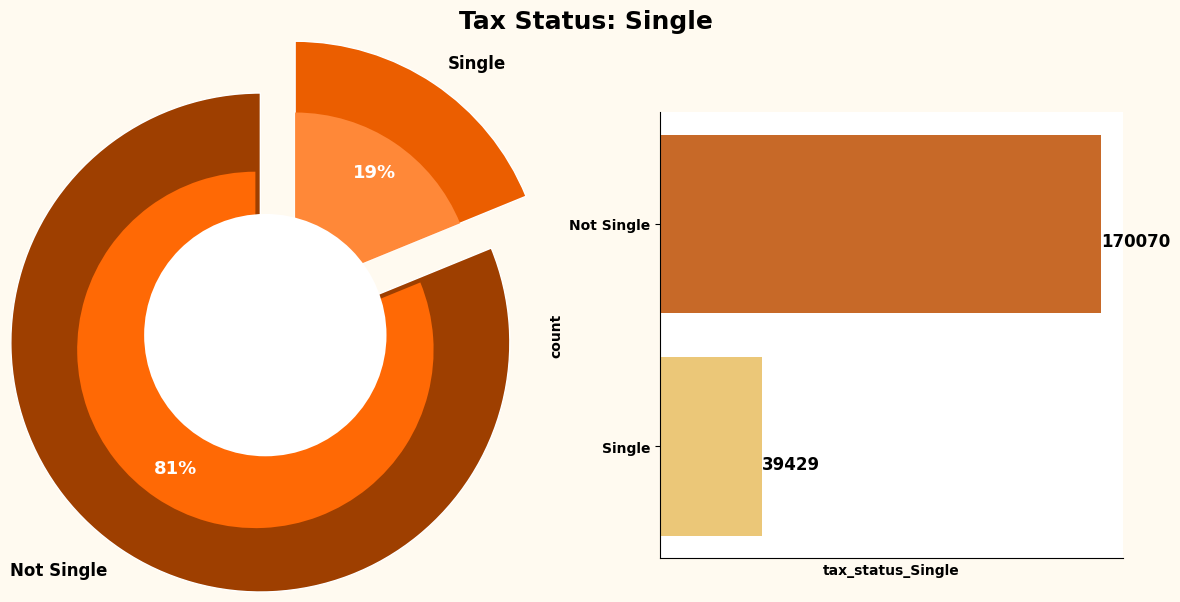

In [27]:
plot_count(df_final, 'tax_status_Single', 'Tax Status: Single')


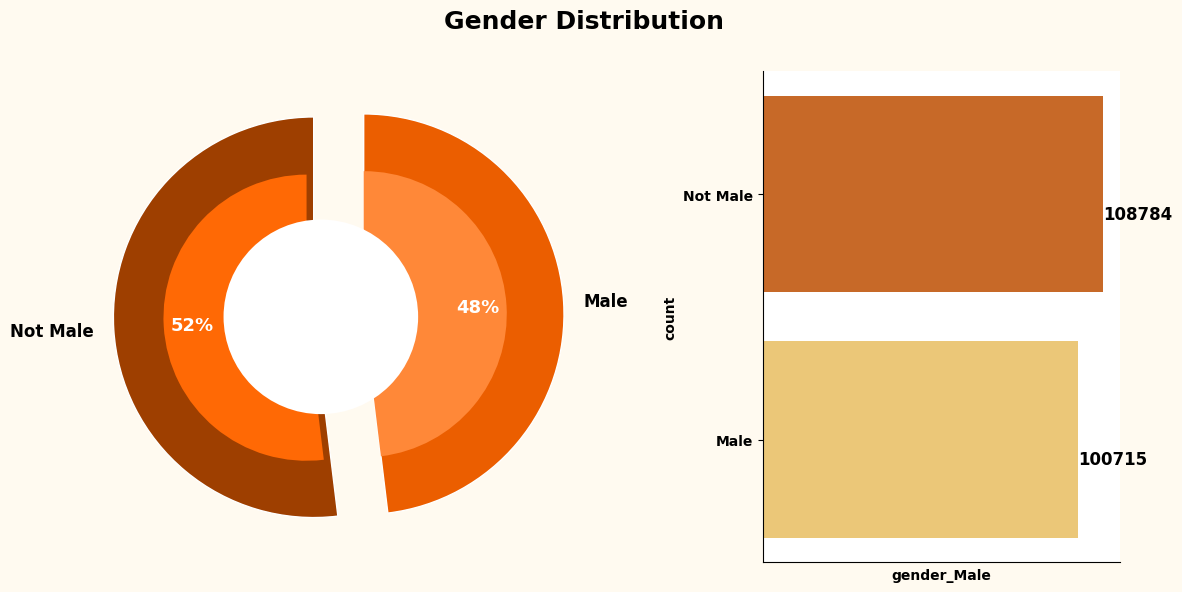

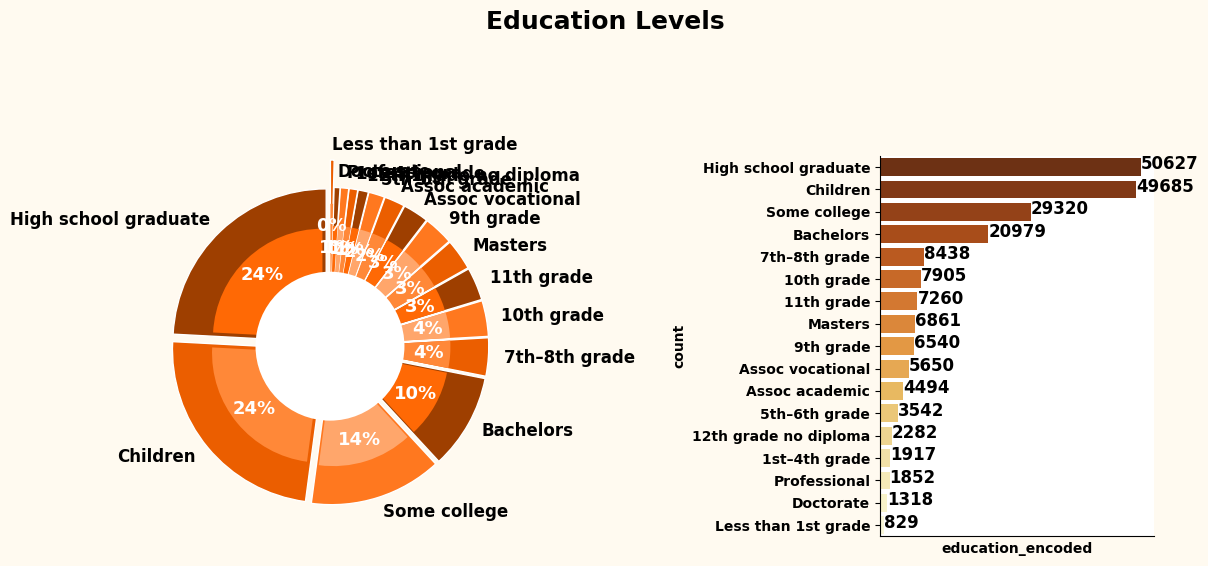

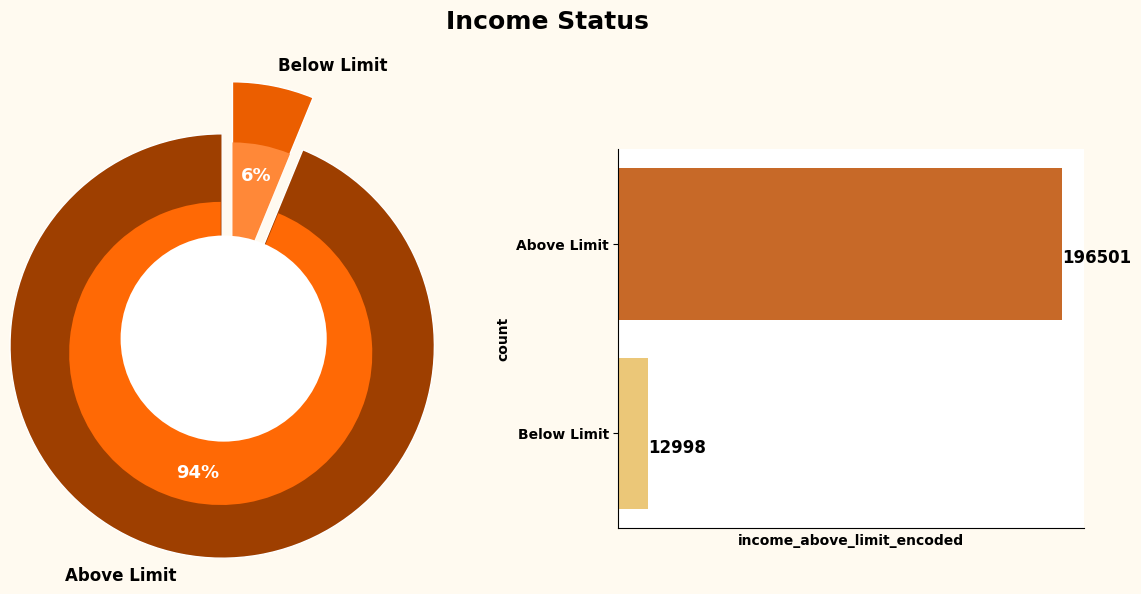

In [28]:
# For one-hot encoded boolean column
plot_count(df_final, 'gender_Male', 'Gender Distribution')

# For label-encoded column with mapping
education_map = {
    0: 'Less than 1st grade',
    1: '1st–4th grade',
    2: '5th–6th grade',
    3: '7th–8th grade',
    4: '9th grade',
    5: '10th grade',
    6: '11th grade',
    7: '12th grade no diploma',
    8: 'High school graduate',
    9: 'Some college',
    10: 'Assoc vocational',
    11: 'Assoc academic',
    12: 'Bachelors',
    13: 'Masters',
    14: 'Professional',
    15: 'Doctorate',
    16: 'Children'
}
plot_count(df_final, 'education_encoded', 'Education Levels', label_map=education_map)

# For binary label-encoded column
income_map = {0: 'Below Limit', 1: 'Above Limit'}
plot_count(df_final, 'income_above_limit_encoded', 'Income Status', label_map=income_map)

In [ ]:
race = df_final['race'].value_counts()

plt.figure(figsize=(20, 10))
plt.pie(race.values, labels=race.index,
        startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('race distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 15},loc='upper left')
plt.show()

In [23]:
print("\nMissing values after preprocessing:")
print(df_final.isnull().sum().sum())


Missing values after preprocessing:
0


In [29]:
print("\n Display target distribution for df:")
target_dist = df_final['income_above_limit_encoded'].value_counts().sort_index(ascending=False)
print(f"\n Target distribution:\n{target_dist}")
# Assuming 0 is 'Above limit' and 1 is 'Below limit' based on the output
print(f"Target ratio: {target_dist[0]/len(df)*100:.2f}% Above limit")


 Display target distribution for df:

 Target distribution:
income_above_limit_encoded
1    196501
0     12998
Name: count, dtype: int64
Target ratio: 6.20% Above limit


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_count(df_final: pd.DataFrame, col: str, title_name: str = 'Train') -> None:
    # Set background color
    plt.rcParams['figure.facecolor'] = '#FFFAF0'

    f, ax = plt.subplots(1, 2, figsize=(12, 6))
    plt.subplots_adjust(wspace=0.1)

    # Count True/False values
    s1 = df_final[col].value_counts()
    N = len(s1)

    # Create labels based on column name
    label_true = col.split('_')[-1]
    label_false = f'Not {label_true}'
    labels = [label_true if val else label_false for val in s1.index]

    outer_sizes = s1
    inner_sizes = s1 / s1.sum()

    outer_colors = ['#9E3F00', '#eb5e00']
    inner_colors = ['#ff6905', '#ff8838']

    ax[0].pie(
        outer_sizes, colors=outer_colors,
        labels=labels, startangle=90, frame=True, radius=1.4,
        explode=[0.05, 0.3],
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
        textprops={'fontsize': 12, 'weight': 'bold'}
    )

    ax[0].pie(
        inner_sizes, colors=inner_colors,
        radius=1, startangle=90,
        autopct='%1.f%%', explode=[0.1, 0.3],
        pctdistance=0.8,
        textprops={'size': 13, 'weight': 'bold', 'color': 'white'}
    )

    center_circle = plt.Circle((0, 0), .68, color='black', fc='white', linewidth=0)
    ax[0].add_artist(center_circle)

    # Bar chart
    sns.barplot(x=s1.values, y=labels, ax=ax[1], palette='YlOrBr_r', orient='horizontal')
    ax[1].spines['top'].set_visible(False)
    ax[1].spines['right'].set_visible(False)
    ax[1].tick_params(axis='x', bottom=False, labelbottom=False)

    for i, v in enumerate(s1):
        ax[1].text(v, i + 0.1, str(v), color='black', fontweight='bold', fontsize=12)

    plt.setp(ax[1].get_yticklabels(), fontweight="bold")
    plt.setp(ax[1].get_xticklabels(), fontweight="bold")
    ax[1].set_xlabel(col, fontweight="bold", color='black')
    ax[1].set_ylabel('count', fontweight="bold", color='black')

    f.suptitle(f'{title_name}', fontsize=18, fontweight='bold')
    plt.tight_layout()
    plt.show()
    plt.rcParams['figure.facecolor'] = '#FFFFFF'

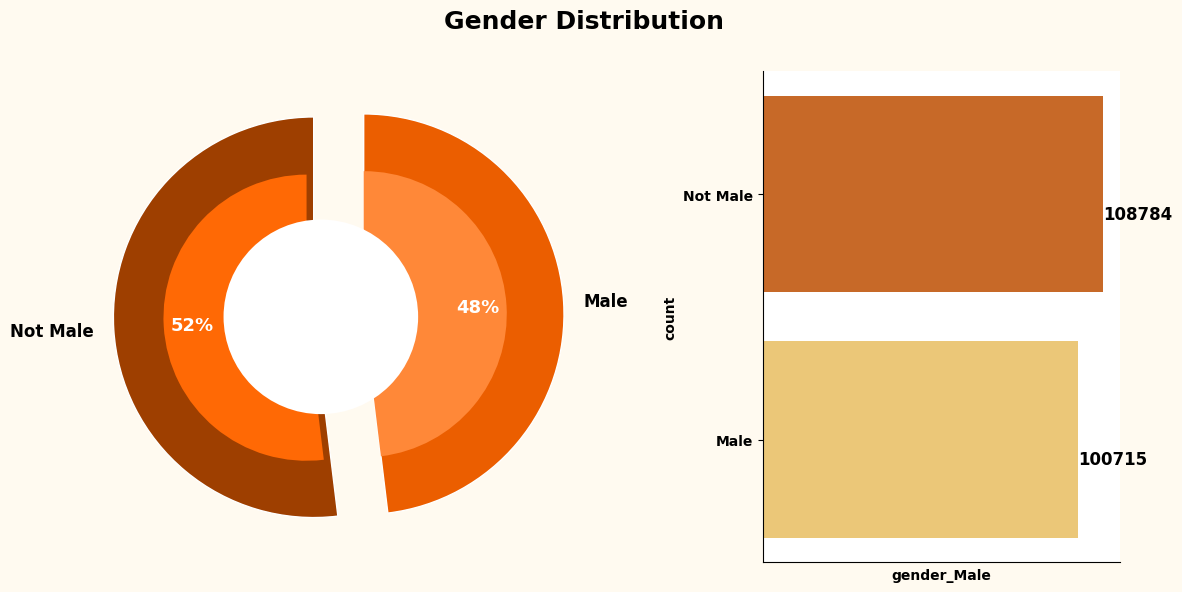

In [32]:
plot_count(df_final, 'gender_Male', 'Gender Distribution')

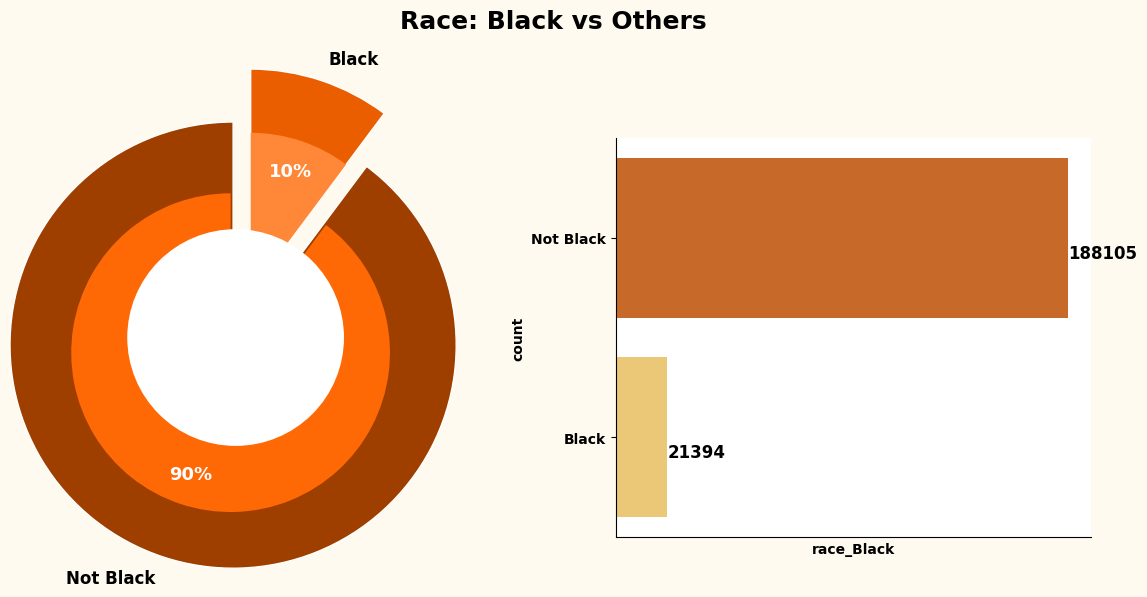

In [33]:
plot_count(df_final, 'race_Black', 'Race: Black vs Others')

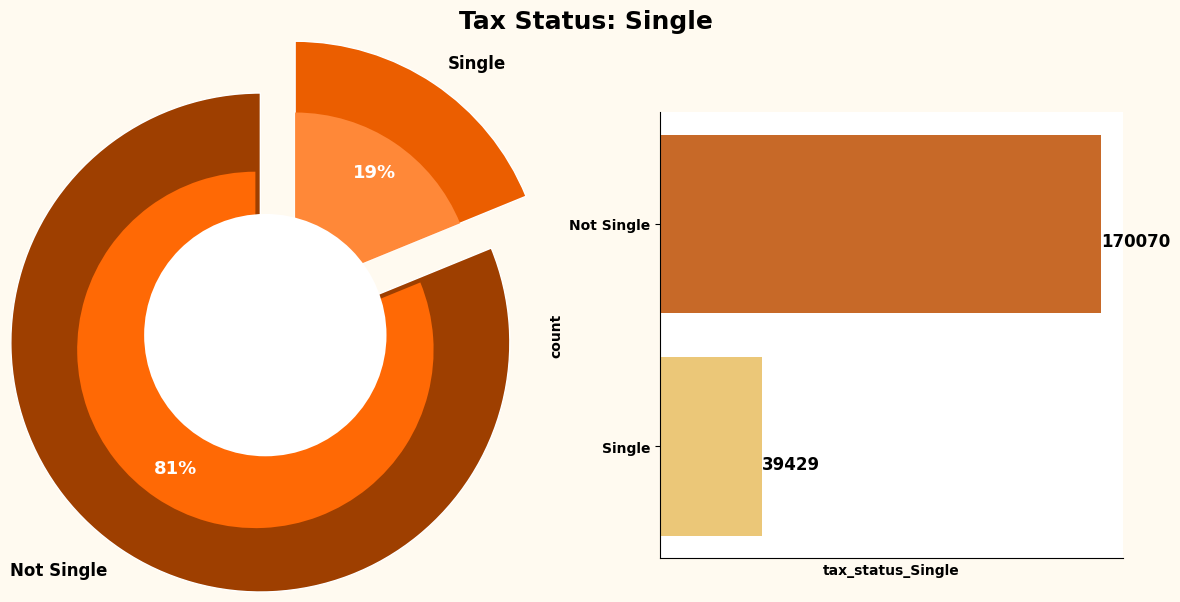

In [34]:
plot_count(df_final, 'tax_status_Single', 'Tax Status: Single')


In [35]:
from sklearn.model_selection import train_test_split

# Features and target
X = df_final.drop('income_above_limit_encoded', axis=1)
y = df_final['income_above_limit_encoded']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Confirm shapes
print(" Data split complete:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")

 Data split complete:
X_train: (167599, 17), X_test: (41900, 17)
y_train: (167599,), y_test: (41900,)


- stratify=y ensures class balance is preserved in both train and test sets.
- random_state=42 ensures reproducibility.
Now you're ready to plug this into your train_multiple_models() function.


In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# 3. Preprocessing pipeline
# Identify numeric columns (education_encoded) and scale them
numeric_features = ['education_encoded']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# All other columns are boolean (already 0/1), no transformation needed
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ],
    remainder='passthrough'  # Keep boolean columns as-is
)

print(" Preprocessing pipeline ready.")

 Preprocessing pipeline ready.


In [ ]:
# Imports
from sklearn.model_selection import GridSearchCV

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


# 3. Model definitions and hyperparameters
models = {
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000),
    'SVM': SVC(random_state=42, class_weight='balanced', probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(random_state=42, verbose=0)
}

param_grids = {
    'Random Forest': {'classifier__n_estimators': [100], 'classifier__max_depth': [10]},
    'Gradient Boosting': {'classifier__n_estimators': [100], 'classifier__learning_rate': [0.1]},
    'Logistic Regression': {'classifier__C': [1], 'classifier__solver': ['liblinear']},
    'SVM': {'classifier__C': [1], 'classifier__kernel': ['rbf']},
    'K-Nearest Neighbors': {'classifier__n_neighbors': [5], 'classifier__weights': ['uniform']},
    "Decision Tree": {"classifier__max_depth": [5]},
    "XGBoost": {"classifier__n_estimators": [100], "classifier__learning_rate": [0.1]},
    "LightGBM": {"classifier__n_estimators": [100], "classifier__learning_rate": [0.1]},
    "CatBoost": {"classifier__iterations": [100], "classifier__learning_rate": [0.1]}
}

    }

# 4. Train and evaluate
results = {}

for name, model in models.items():
    print(f"\n Training {name}...")

    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    grid = GridSearchCV(pipeline, param_grids[name], cv=3, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f" {name} Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    results[name] = {
        'best_params': grid.best_params_,
        'accuracy': acc,
        'report': classification_report(y_test, y_pred, output_dict=True)
    }


 Training Random Forest...
 Random Forest Accuracy: 0.7884
Classification Report:
              precision    recall  f1-score   support

           0       0.21      0.86      0.34      2600
           1       0.99      0.78      0.87     39300

    accuracy                           0.79     41900
   macro avg       0.60      0.82      0.60     41900
weighted avg       0.94      0.79      0.84     41900


 Training Gradient Boosting...
 Gradient Boosting Accuracy: 0.9414
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.18      0.28      2600
           1       0.95      0.99      0.97     39300

    accuracy                           0.94     41900
   macro avg       0.77      0.59      0.62     41900
weighted avg       0.93      0.94      0.93     41900


 Training Logistic Regression...
 Logistic Regression Accuracy: 0.7792
Classification Report:
              precision    recall  f1-score   support

           0       0.2

In [ ]:
def create_comprehensive_visualizations(results, X_test, y_test, model_info):
    """Create comprehensive visualizations for model comparison"""
    print("\n Creating comprehensive visualizations...")

    # 1. Model Comparison Bar Chart
    models = list(results.keys())
    f1_scores = [results[model]['f1_score'] for model in models]
    accuracies = [results[model]['accuracy'] for model in models]
    auc_scores = [results[model]['roc_auc'] for model in models]

    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 12))

    # F1 Scores
    bars1 = ax1.barh(models, f1_scores, color='skyblue')
    ax1.set_xlabel('F1 Score')
    ax1.set_title('Model Comparison - F1 Score')
    ax1.bar_label(bars1, fmt='%.3f')

    # Accuracies
    bars2 = ax2.barh(models, accuracies, color='lightgreen')
    ax2.set_xlabel('Accuracy')
    ax2.set_title('Model Comparison - Accuracy')
    ax2.bar_label(bars2, fmt='%.3f')

    # AUC Scores
    bars3 = ax3.barh(models, auc_scores, color='salmon')
    ax3.set_xlabel('ROC AUC Score')
    ax3.set_title('Model Comparison - ROC AUC')
    ax3.bar_label(bars3, fmt='%.3f')

    # Combined metrics
    x = np.arange(len(models))
    width = 0.25
    ax4.bar(x - width, f1_scores, width, label='F1 Score', color='skyblue')
    ax4.bar(x, accuracies, width, label='Accuracy', color='lightgreen')
    ax4.bar(x + width, auc_scores, width, label='AUC', color='salmon')
    ax4.set_xlabel('Models')
    ax4.set_ylabel('Scores')
    ax4.set_title('Combined Model Metrics')
    ax4.set_xticks(x)
    ax4.set_xticklabels(models, rotation=45)
    ax4.legend()

    plt.tight_layout()
    plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')

    plt.show()


In [ ]:
# 2. Confusion Matrices for top 3 models
    top_models = sorted(results.items(), key=lambda x: x[1]['f1_score'], reverse=True)[:3]

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    for idx, (name, result) in enumerate(top_models):
        cm = confusion_matrix(y_test, result['predictions'])
        sns.heatmap(cm, annot=True, fmt='d', ax=axes[idx], cmap='Blues',
                   xticklabels=['Below', 'Above'],
                   yticklabels=['Below', 'Above'])
        axes[idx].set_title(f'{name}\nF1: {result["f1_score"]:.3f}')
        axes[idx].set_xlabel('Predicted')
        axes[idx].set_ylabel('Actual')

    plt.tight_layout()
    plt.savefig('confusion_matrices.png', dpi=300, bbox_inches='tight')

    plt.show()

In [ ]:
 # 3. ROC Curves for all models
    plt.figure(figsize=(10, 8))
    for name, result in results.items():
        fpr, tpr, _ = skplt.metrics.roc_curve(y_test, result['probabilities'])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})', linewidth=2)

    plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves - Model Comparison')
    plt.legend(loc="lower right")
    plt.grid(True, alpha=0.3)
    plt.savefig('roc_curves.png', dpi=300, bbox_inches='tight')

    plt.show()

In [ ]:
 # 4. Precision-Recall Curves
plt.figure(figsize=(10, 8))
  for name, result in results.items():
      precision, recall, _ = precision_recall_curve(y_test, result['probabilities'])
      pr_auc = auc(recall, precision)
      plt.plot(recall, precision, label=f'{name} (AUC = {pr_auc:.3f})', linewidth=2)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves - Model Comparison')
plt.legend(loc="upper right")
plt.grid(True, alpha=0.3)
plt.savefig('precision_recall_curves.png', dpi=300, bbox_inches='tight')

plt.show()


In [ ]:
print(" Visualizations saved!")


In [ ]:
def save_models_and_results(results, model_info, best_overall_model):
    """Save all models and results"""
    print("\n Saving models and results...")

    # Save individual models
    for name, result in results.items():
        # Clean model name for filename
        clean_name = name.lower().replace(' ', '_')
        joblib.dump(result['model'], f'model_{clean_name}.pkl')

    # Save the best overall model separately
    joblib.dump(best_overall_model, 'best_model.pkl')

     # Enhanced model info
    enhanced_model_info = {
        'all_models': list(results.keys()),
        'model_performance': {name: {
            'f1_score': result['f1_score'],
            'accuracy': result['accuracy'],
            'roc_auc': result['roc_auc'],
            'best_params': result['best_params']
        } for name, result in results.items()},
        'best_model': max(results.items(), key=lambda x: x[1]['f1_score'])[0],
        'best_model_f1': max(results.items(), key=lambda x: x[1]['f1_score'])[1]['f1_score'],
        **model_info
    }

    joblib.dump(enhanced_model_info, 'enhanced_model_info.pkl')


In [ ]:
 # Create performance summary
    performance_df = pd.DataFrame({
        'Model': list(results.keys()),
        'F1_Score': [results[model]['f1_score'] for model in results],
        'Accuracy': [results[model]['accuracy'] for model in results],
        'ROC_AUC': [results[model]['roc_auc'] for model in results]
    }).sort_values('F1_Score', ascending=False)

    performance_df.to_csv('model_performance_summary.csv', index=False)
    print(" Models and results saved!")


In [ ]:
def main():
    # Update this path to your CSV file
    CSV_FILE_PATH = "income_dataset.csv"  # Change to your actual file name

    if not os.path.exists(CSV_FILE_PATH):
        print(f" File '{CSV_FILE_PATH}' not found!")
        print("Available files:")
        for file in os.listdir('.'):
            if file.endswith('.csv'):
                print(f"  - {file}")
        return

    # Load and preprocess data
    df_processed = load_and_preprocess_data(CSV_FILE_PATH)


In [ ]:
print("\n Trained Model Names:")
if results:
    for name in results.keys():
        print(f"- {name}")
else:
    print("No models were trained or results are empty.")

In [ ]:
# Create preprocessor
    preprocessor, categorical_cols, numerical_cols = create_advanced_preprocessor(X)


In [ ]:
  # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    print(f"\n Data split:")
    print(f"Training set: {X_train.shape}")
    print(f"Test set: {X_test.shape}")
    print(f"Positive class in training: {y_train.sum()}/{len(y_train)} ({y_train.mean():.2%})")
    print(f"Positive class in test: {y_test.sum()}/{len(y_test)} ({y_test.mean():.2%})")

In [ ]:
 # Handle class imbalance with SMOTE
    print("\n Applying SMOTE for class imbalance...")
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(
        preprocessor.fit_transform(X_train),
        y_train
    )

    print(f"After SMOTE - Training set: {X_train_resampled.shape}")
    print(f"After SMOTE - Positive class: {y_train_resampled.sum()}/{len(y_train_resampled)} ({y_train_resampled.mean():.2%})")

In [ ]:
# Train multiple models
    results, best_models = train_multiple_models(X_train, X_test, y_train, y_test, preprocessor)

    # Find best model
    best_model_name = max(results.items(), key=lambda x: x[1]['f1_score'])[0]
    best_overall_model = best_models[best_model_name]

    print(f"\n Best Model: {best_model_name}")
    print(f" Best F1-Score: {results[best_model_name]['f1_score']:.4f}")

In [ ]:
def main(X_data, y_data):
    # Use already prepared features and target
    X = X_data
    y = y_data

    # Create preprocessor
    preprocessor, categorical_cols, numerical_cols = create_advanced_preprocessor(X)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    print(f"\n Data split:")
    print(f"Training set: {X_train.shape}")
    print(f"Test set: {X_test.shape}")
    print(f"Positive class in training: {y_train.sum()}/{len(y_train)} ({y_train.mean():.2%})")
    print(f"Positive class in test: {y_test.sum()}/{len(y_test)} ({y_test.mean():.2%})")

    # Handle class imbalance with SMOTE
    print("\n Applying SMOTE for class imbalance...")
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(
        preprocessor.fit_transform(X_train),
        y_train
    )

    print(f"After SMOTE - Training set: {X_train_resampled.shape}")
    print(f"After SMOTE - Positive class: {y_train_resampled.sum()}/{len(y_train_resampled)} ({y_train_resampled.mean():.2%})")

    # Train multiple models
    results, best_models = train_multiple_models(X_train_resampled, X_test, y_train_resampled, y_test, preprocessor)

    # Find best model
    best_model_name = max(results.items(), key=lambda x: x[1]['f1_score'])[0]
    best_overall_model = best_models[best_model_name]

    print(f"\n Best Model: {best_model_name}")
    print(f" Best F1-Score: {results[best_model_name]['f1_score']:.4f}")

    # Model info for saving
    model_info = {
        'categorical_columns': categorical_cols,
        'numerical_columns': numerical_cols,
        'all_columns': X.columns.tolist(),
        'feature_names': preprocessor.get_feature_names_out().tolist(),
        'class_distribution_original': dict(y.value_counts()),
        'best_model_name': best_model_name
    }

    # Create visualizations
    create_comprehensive_visualizations(results, X_test, y_test, model_info)

    # Save models and results
    save_models_and_results(results, model_info, best_overall_model)

    print(f"\n Enhanced training completed!")
    print(f" Generated files:")
    print(f"   - 7 trained models (model_*.pkl)")
    print(f"   - Best model (best_model.pkl)")
    print(f"   - Enhanced model info (enhanced_model_info.pkl)")
    print(f"   - Model performance summary (model_performance_summary.csv)")
    print(f"   - 4 visualization files (*.png)")
    print(f"\n You can now run: streamlit run enhanced_app.py")

    return results, best_models

if __name__ == "__main__":
    # Assign the returned results to global variables
    global results, best_models
    results, best_models = main(X, y)